# 0.) Import and Clean data

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [134]:
#drive.mount('/content/gdrive/', force_remount = True)

In [135]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [136]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [137]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [138]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [139]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

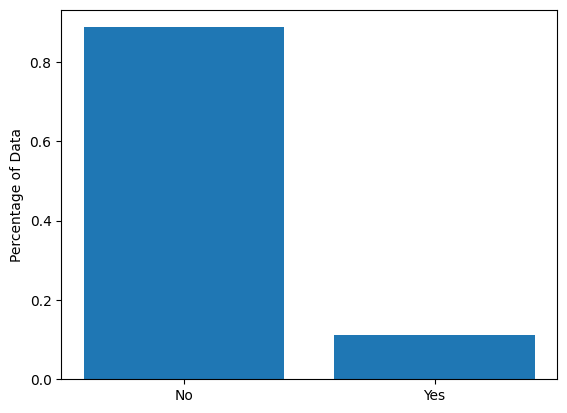

In [140]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [141]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [142]:
from imblearn.over_sampling import RandomOverSampler

In [143]:
ros = RandomOverSampler()

In [144]:
###############
###TRANSFORM###
###############


X_scaled, y_train = ros.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [145]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.028\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.405\ngini = 0.375\nsamples = 24120\nvalue = [18084, 6036]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.234\nsamples = 13699\nvalue = [11842, 1857]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.21\nsamples = 13314\nvalue = [11725, 1589]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.423\nsamples = 385\nvalue = [117, 268]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.283\ngini = 0.48\nsamples = 10421\nvalue = [6242, 4179]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 7556\nvalue = [3755, 3801]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.229\nsamples = 2865\nvalue = [2487, 378]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.025\ngini = 0.401\nsamples = 27040\nvalue = [7496, 19544]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.482\nsamples = 14245\nvalue = [5757, 8488]\ncla

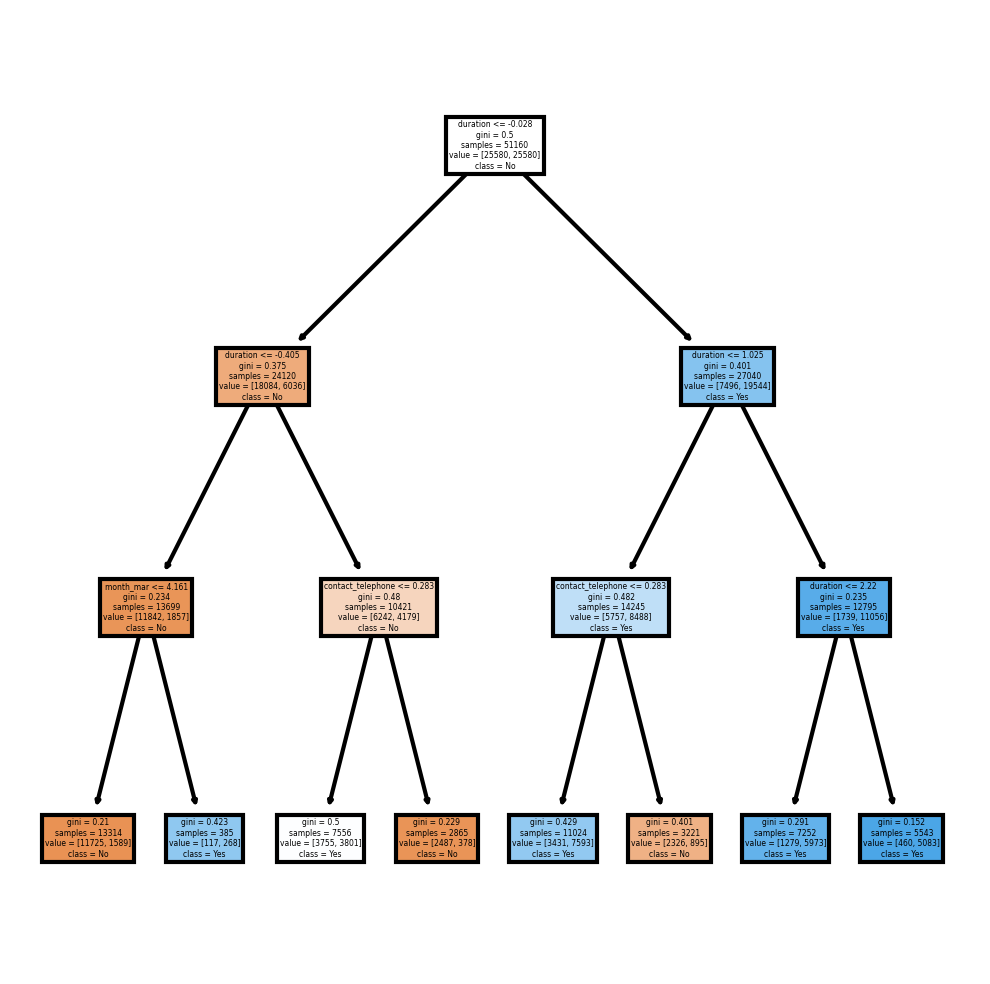

In [146]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [147]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

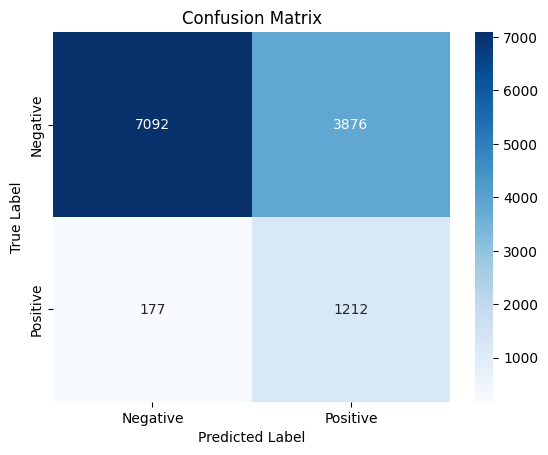

In [148]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
#point of bagging and boosting is to improve model's accuracy and lose interpretability

# 3.) Use bagging on your descision tree

In [149]:
dtree = DecisionTreeClassifier(max_depth=3)

In [150]:
bagging = BaggingClassifier(estimator = dtree,
                            n_estimators = 100,
                            max_samples = .5,
                            max_features = 1.)

In [151]:
bagging.fit(X_scaled,y_train)
y_pred = bagging.predict(X_test)


/Users/tongwu/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [152]:
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

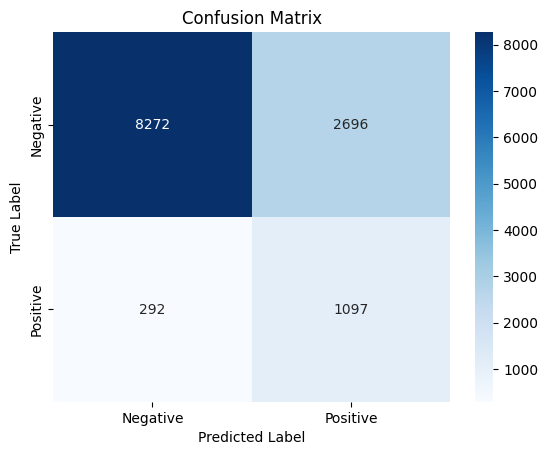

In [153]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
dtree = DecisionTreeClassifier(max_depth = 3)
boost = AdaBoostClassifier(estimator = dtree,
                           n_estimators = 100,
                           learning_rate = .1)

In [156]:
boost.fit(X_scaled,y_train)

/Users/tongwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)

In [157]:
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true,y_pred)

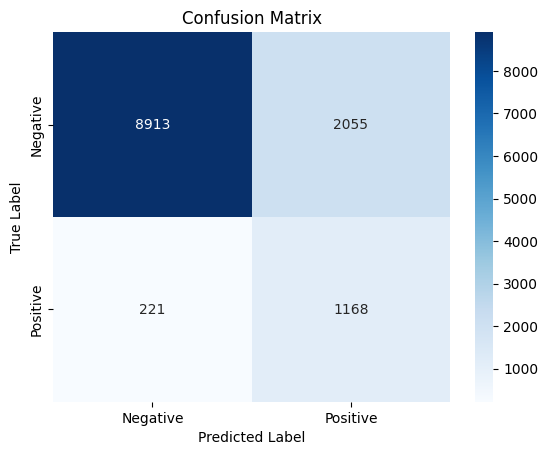

In [158]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

Interpret coefficients and significance

In [159]:
from sklearn.linear_model import LogisticRegression


In [160]:
base_predictions = [dtree_main.predict(X_scaled),
                    list(boost.predict(X_scaled)), 
                    list(bagging.predict(X_scaled))]


In [161]:
base_predictions = np.column_stack(base_predictions)

In [163]:
super_learner = LogisticRegression()

In [164]:
super_learner.fit(base_predictions,y_train)

/Users/tongwu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [165]:
super_learner.coef_ #indicates the weight for each model, the higher the better

array([[1.01765209, 2.81487666, 0.01570788]])

# 6.)

The confusion matrices for decision tree, boosting, and bagging indicate that boosting model has the highest number in the sum of true positives and true negatives cases. Based on the meta model coefficients, boosting model has a coefficient of 2.81, which is the highest among the three models, suggesting that boosting model performs the best in contributing to meta model's predictions.